## Introduction

This tutorial will introduce minimum spanning trees (MST) and explore algorithms that will determine the MST from a given graph. We will be introducing and implementing Kruskal's and Prim's algorithm. This tutorial will conclude by taking our implementations to find the minimum spanning tree of stock market correlation data.  

### Table of Contents 

1. [Graphs 101](#Graphs-101)
2. [MSTs](#What-is-an-MST?)
3. [Graph Libraries](#Graph-Libraries)
4. [Kruskal's Algorithm](#Kruskal's-Algorithm)
5. [Prim's Algorithm](#Prim's-Algorithm)
6. [Testing](#Testing)
7. [Application: MST of Stock Data](#MST-Application) 
8. [Wrap up](#Wrap-Up)


## Graphs 101 

Please review Profesor Kolter's slides on <a href ="http://www.datasciencecourse.org/notes/graphs/graphs.pdf" >Graph Theory</a> for a quick overview on graph theory. As a refresher, let's review two important terms: 

    1. Tree: A tree is a connected graph that contains no cycles. Therefore, it is possible to go from one vertex to any other vertex in the tree, but since there are no cycles there is only one path between two nodes. 
        i.e. Binary Search Trees 
    2. Forest: A forest is a collection of trees. 
    
<img src = "https://www.anyline.com/wp-content/uploads/2017/10/forest.png" style="width: 600px;"> 
<br>
    
    

Throughout the rest of this tutorial, we will be working with **weighted**, **undirected** graphs and finding their MSTs. This graph is cyclic, and is therefore not a spanning tree. 

<img src = "img/graph.png" alt="Drawing" style="width: 400px;"/>

## What is an MST? 

We have defined a tree to be as an acyclic, undirected graph. Furthermore, a minimum spanning tree is the lightest weighted tree that can be formed from a given graph while maintaining that all the vertices are still connected (does not become a forest like above). 


This figure shows one of the four possible spanning tree representations of the graph above. However, the weight of this graph is 42 and is not the minimum spanning tree. 

<img src = "img/spanning_tree.png" alt="Drawing" style="width: 400px;"/>

This last figure shows the minimum spanning tree representation of the graph above. We see that the graph maintains the tree property and has the minimal weight of all the possible spanning trees. 

<img src = "img/mst.png" alt="Drawing" style="width: 400px;"/>

From the figures above, we see some **key properties of MSTs** that will come useful when implementing our algorithms:
    1. All the vertices in the graph are part of the MST
    2. A subset of edges in the graph are part of the MST 
    3. The MST has exactly V-1 edges. This is because having more than V-1 edges in the tree will create a cycle, 
    and having less will create forest. 
        
### Applications 

In the real world, minimum spanning trees have a wide array of $applications ^{1}$. One of the most common applications of MSTs is designing large networks to minimize cost. When designing a network such as a phone network, we need to connect all the different phone lines while minimizing the amount of wiring being used. This can be done using an MST since we can guarantee that every phone line will be connected and the network will have the lightest weight. 

$^{1}$For further examples on how MSTs can be applied please visit the following link to <a href = "http://www.utdallas.edu/~besp/teaching/mst-applications.pdf">UTDallas CS Notes</a>.

## Graph Libraries

To run our graphs in Python, we will be using the library called Networkx. The Networkx library has many built-in functions making it easier to query information and create small graphs. 

For more information on the library, please check out the library's <a href = "https://networkx.github.io/documentation/networkx-1.10/index.html"> manpage</a> (comments are provided in code for clarifications). For our purposes, there is no need to install any modules, instead we can use the networkx library by running the following import statement. 

In [6]:
import networkx as nx 

In [7]:
def createGraph(G, edges): 
    nodes = set()
    #add the nodes to a set 
    for (i,j,_) in edges: 
        nodes.add(i)
        nodes.add(j)
    #add all of the edges from the edges list 
    G.add_weighted_edges_from(edges)
    #add all of the nodes from the nodes set 
    G.add_nodes_from(list(nodes))
    return G

Let's create the graph from the introduction above. 

In [8]:
empty = nx.Graph()
#adding EDGE i,j will also add EDGE j,i (library takes care of it for us)
small_graphEdges =  [( "0", "1", 10.0), ("0", "3", 17.0), 
                                ("1", "2", 8.0), ("1", "4", 1.0), 
                                ("1", "3", 12.0), ("2", "3", 6.0), 
                                ("2", "4",5.0)] 
small_graph = createGraph(empty, small_graphEdges)

We will be using the pyplot library from matplotlib to visualize the graphs. For more information on this specific library, please visit the following <a href =" https://matplotlib.org/api/pyplot_api.html" > link</a>. Below is a wrapper function that will visualize the graph, but before that we must import the pyplot library from matplotlib. 

In [9]:
import matplotlib.pyplot as plt 

In [10]:
def visualizeGraph(G): 
    %matplotlib inline
    nx.draw(G, with_labels = True) 
    plt.draw()
    plt.show()

## Kruskal's Algorithm 

Kruskal's algorithm is a sequential algorithm that works to find the minimum spanning tree for a graph by finding the lightest weighted edge in the graph that has not been added minimum spanning tree yet, so long as that edge does not create a cycle with any of the edges that were already added to the minimum spanning tree.   

Our implementation will look like the following: 
    1. Initialize all vertices to be their own forests
    2. Sort all the edges by their weights 
    3. Iterate over the sorted edges 
        a. Current edge will be the lightest edge (iterating sequentially)  
        b. Check our union-find data structure to see if this vertex forms a cycle with the current MST
            i. If it does, ignore and continue iterating 
            ii. If it does not, add to this edge to the MST and update the union-find representation
    3. Once all the edges have been iterated over or we have added V-1 nodes, terminate 

### Illustration

<img src = "img/krus-0.png" alt="Drawing" style="width: 400px;"/>
<center> Edge 1,4 has the lightest weight and does not form a cycle, so we add it to our MST. </center>

<img src = "img/krus-1.png" alt="Drawing" style="width: 400px;"/>
<center> We apply the same logic for edge 2,4 and then edge 2,3.  </center>

<img src = "img/krus-2.png" alt="Drawing" style="width: 400px;"/>
<center> The next lightest edge is edge 1,2. We see that adding this edge would create a cycle in the MST between nodes 1,2,4. We do not add this edge.   </center>

<img src = "img/krus-3.png" alt="Drawing" style="width: 400px;"/>
<center> The next lightest edge is edge 0,1 which will not form a cycle. Therefore, we add the edge, and terminate the process since we have V-1 edges in our MST.  </center>

### Union-Find Data Structure 

We will begin by implementing the Union-Find data structure, also known as disjoint set data structure, which is necessary for us to implement Kruskal's. This data structure will help us keep track of which vertices are part of the same forest. We do this by storing node-parent pairings in a dictionary. 

All nodes are initilalized to be in their own forest (point to themselves), and for this reason we call them supervertices. Calling the union function will add a node and its children to forest, and the find function will take a node find the supervertex of that node's forest.  

In [11]:
class Union_Find: 
    def __init__(self, nodes):
        self.dict = dict() 
        #initalize all nodes in their own forest
        #all nodes are supervertices 
        for i in nodes: 
            if i not in self.dict: 
                self.dict[i] = i
                
    #recursively finding the super vertex of the forest given a node 
    def find( self, node ): 
        parent = self.dict[node]
        if parent == node: 
            return node
        else: 
            return Union_Find.find(self, parent)
        
    #making the node a child in the forest  
    def union( self, v,parent ): 
        self.dict[v] = parent
        
    #for debugging purposes    
    def show(self):
        print(self.dict)
    

### Kruskal's Implementation

In [12]:
def sortWeights( edges1 ):
    (_, _, w1) = edges1
    return w1
    
#REQUIRES: an undirected, weighted graph 
#ENSURES: a minimum spanning tree of the given graph 
def kruskals(G): 
    #get the nodes and edges
    nodes = G.nodes()
    edges = G.edges()
    
    #list of edges in the format (i, j, weight) 
    weighted_edges = []
    for i,j in edges: 
        weight = G[i][j]['weight']
        weightEdge = (i, j, weight)
        weighted_edges.append(weightEdge)
    
    #sort the edges in by weight (using python sorted function)
    sorted_weights = sorted(weighted_edges, key = sortWeights)
    
    #initialize empty graph, which will be our MST 
    MST = nx.Graph()
    
    #initialize the union find data structure 
    uf = Union_Find(nodes)

    #implementing step #2  
    for (i,j,w) in sorted_weights:
        if len(MST.edges) == ( len(nodes) -1 ): 
            #MST has been formed if we have added V-1 edges, exit loop
            break 
            
        #get both nodes' parents 
        i_forest = uf.find(i)
        j_forest = uf.find(j)
        
        
        if i_forest == j_forest:
            #both i and j belong to the same forest, do not add edge because it will form a cycle
            continue
        elif j == j_forest: 
            #j is the supervertex of its set, so have j's forest will be added to i's forest
            uf.union(j,i)
            MST.add_weighted_edges_from([(i,j,w)])

        else: 
            #i is either supervertex, or neither i or j are supervertices 
            uf.union(i, j)
            MST.add_weighted_edges_from([(i,j,w)])
        
    return MST   

## Prim's Algorithm

Prim's algorithm is another sequential algorithm that finds the minimum spanning tree of a graph. In contrast to Kruskal's, Prim's algorithm uses a priority-queue data structure to determine which edges to add to our current MST, and a set to keep track of which nodes we have already visited. Prim's algorithm will only add an edge to our current MST if either vertex has not been visited yet. 

Our implementation will follow these steps: 
    1. Initialize the min-heap and initalize a visited set 
    2. Choose a random starting node and add to the visited set
    3. Add all edges from the starting node to the min-heap 
    4. Iterate until the length of the visited set is not equal to the number of nodes in the graph 
        a. Pop off the top-most edge (which will be the most minimal edge not seen yet) 
        b. Check to make sure that both vertices from this edge are not in our visited set 
            i. If both are in visited, then ignore node and continue 
            ii. Else, add the edge to the MST and add the unvisited vertex to the visited set 
            iii. Set the new node as the starting node, so that we add the new outgoing edges from this vertex to 
                 our PQ.
    5. Once we have finished iterating, MST will be formed 

### Illustration
We will be starting at node 0.
<img src = "img/prims-1.png" alt="Drawing" style="width: 400px;"/>
<center> After adding both outgoing edges to our PQ, we see that edge 0,1 is the lighter edge, so it is added to our MST. Edge 0,3 (indicated by red) is still in our PQ.  </center> 
<img src = "img/prims-2.png" alt="Drawing" style="width: 400px;"/>
<center> Since we just added node 1 to our MST, we now add its outgoing edges to the PQ. Edge 1,4 is the lightest edge, so we add it. Edges 0,3 and 1,3 remain in our PQ. </center> 
<img src = "img/krus-3.png" alt="Drawing" style="width: 400px;"/>
<center> Apply the same logic and add edge 2,4 and edge 2,3 to get our MST. </center> 

### HeapDict Data Structure

We will be importing the heapdict python package, which works very similarly to the in-built python dictionary while acting as a priority queue. For more information regarding this library please visit: https://pypi.python.org/pypi/HeapDict. 

While implementing Prim's algorithm, we will be using the pop operation from this data structure which will allow us to get the lightest edge on every iteration. 

In [13]:
import heapdict 

### Prim's Algorithm Implementation

In [14]:
#REQUIRES: an undirected, weighted graph 
#ENSURES: a minimum spanning tree of the given graph 
def getFirstNode(nodes): 
    #can use any node as starting node, we take the last node from G.nodes()
    #do not worry about this too much, it is because we cannot index into G.nodes()
    start = None
    for node in nodes: 
        start = node
    return start 

def prims(G): 
    #initialize priority queue 
    pq = heapdict.heapdict() 
    
    nodes = G.nodes()
    numNodes = len(nodes)
    
    #initialize priority queue 
    visited = set()
    MST = nx.Graph() 
    
    newNode = True
    
    if len(nodes) > 0: 
        start = getFirstNode(nodes)
        visited.add(start)
        
        while ( len(visited) != numNodes ):
            #only add outgoing edges to PQ, if we have added a new node to our visited set
            if newNode: 
                outgoingNewEdges = G[start]
                for edge in outgoingNewEdges: 
                    weight = G[start][edge]['weight']
                    pq[(start, edge)] = weight 
                    
            #get lightest edge 
            if (len(pq) != 0):
                ((src, new), w) = pq.popitem() 
            else: 
                raise Exception('Trying to pop from empty PQ!') 
        
            #if we have already added this node, continue 
            if (new in visited): 
                newNode = False
                continue 
            else: 
                #NOTE: v2 is an outgoing vertex from src, so we have already seen src and added it to visited 
                visited.add(new)
                start = new
                newNode = True
                MST.add_weighted_edges_from([(src,new,w)])
            
        return MST 
    else: 
        print("returning an empty MST for an empty graph")
        return MST 

## Testing 

In this part of the module we will be testing all the edges in the the MST produced by our implementations of Kruskal's and Prim's with our pre-computed MST (verified for correctness), using the function below. We first will be testing and visualizing the small graph from our introduction above. 

In [15]:
def testingFunction(graph, correctGraph):
    #check if nodes are all the same 
    assert( set( graph.nodes() ) == set( correctGraph.nodes() ) )
    #check if edges are all the same 
    for node in graph.nodes(): 
        testEdges = graph[node] 
        correctEdges = correctGraph[node]
    return True 

Kruskal's graph produces the same MST graph as the introduction.

Prim's graph produces the same MST graph as the introduction.

Plotting the MST for the small graph above using Kruskal's.


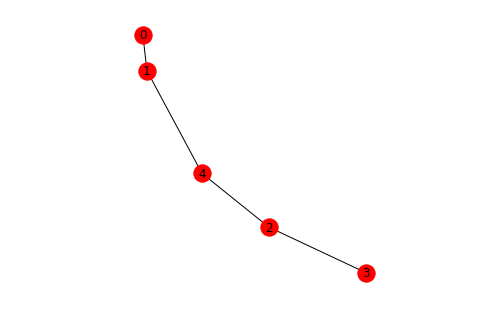

Plotting the MST for the small graph  above using Prim's.


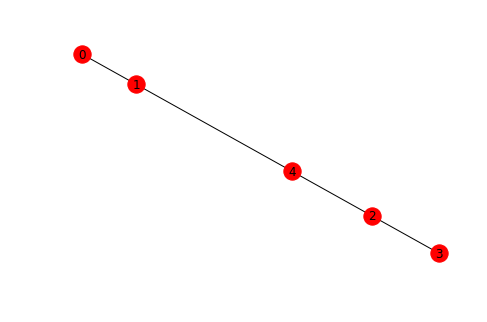

In [16]:
k_mst = kruskals(small_graph)
p_mst = prims(small_graph)

smallMST = createGraph(nx.Graph(), [('0','1',10.0),('1','4',1.0),('2','4',5.0),('2','3',6.0)])

if testingFunction(k_mst, smallMST):
    print("Kruskal's graph produces the same MST graph as the introduction.\n")
else: 
    print("Kruskal's graph does not produce the same MST graph as the introduction.\n")

if testingFunction(p_mst, smallMST):
    print("Prim's graph produces the same MST graph as the introduction.\n")
else: 
    print("Prim's graph does not produce the same MST graph as the introduction.\n")
    
print("Plotting the MST for the small graph above using Kruskal's.")
visualizeGraph(k_mst)
print("Plotting the MST for the small graph  above using Prim's.")
visualizeGraph(p_mst)

Next we will testing our code on a larger graph, with its MST show in red in the picture below. 

<img src ="img/bigGraph.png" alt = "Drawing" width ="300px">

Kruskal's graph produces the same MST graph as the figure above.

Prim's graph produces the same MST graph as the figure above.

Plotting the MST for the big graph above using Kruskal's.


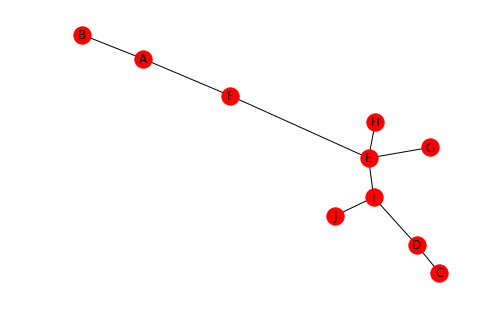

Plotting the MST for the big graph above using Prim's.


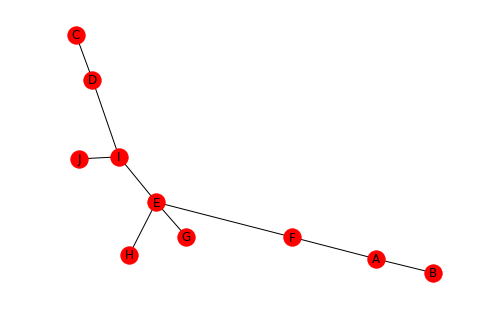

In [17]:
empty = nx.Graph()
bigGraph_edges =  [( "A", "B", 3.0), ("A", "F", 2.0), 
                    ("B", "C", 17.0), ("B", "D", 16.0), 
                    ("C", "D", 8.0), ("C", "I", 18.0), 
                    ("D", "E",11.0), ("D", "I", 4.0), 
                    ("E", "F",1.0), ("E", "H", 5.0), 
                    ("E", "G",6.0), ("E", "I", 10.0), 
                    ("F", "G",7.0), ("G", "H",15.0),
                   ("H", "I",12.0), ("H", "J",13.0), 
                   ("I", "J",9.0) ] 
bigGraph = createGraph(empty, bigGraph_edges)
#run Kruskal's and Prim's to get the MSTs
k_mst2 = kruskals(bigGraph)
p_mst2 = prims(bigGraph)

#the verified MST represented by the red lines above
bigMSTEdges = [( "A", "B", 3.0), ("A", "F", 2.0), ("E", "F",1.0),("E", "G",6.0), ("E", "H", 5.0), ("E", "I", 10.0),
               ("D", "I", 4.0), ("C", "D", 8.0),  ("I", "J",9.0)]

bigMST = createGraph(empty, bigMSTEdges)

if testingFunction(k_mst2, bigMST):
    print("Kruskal's graph produces the same MST graph as the figure above.\n")
else: 
    print("Kruskal's graph does not produce the same MST graph as the introduction.\n")
if testingFunction(p_mst2, bigMST):
    print("Prim's graph produces the same MST graph as the figure above.\n")
else: 
    print("Prim's graph does not produce the same MST graph as the introduction.\n")
   
%matplotlib inline
print("Plotting the MST for the big graph above using Kruskal's.")
visualizeGraph(k_mst2)
print("Plotting the MST for the big graph above using Prim's.")
visualizeGraph(p_mst2)


## Application: Stock Market Visualization with MSTs

Another use case of MSTs are to visualize very large or dense graphs in a simple and coherent representation. 

In this application, we take stock market correlation data between 11 different tickers. The nodes in this graph are represented by tickers such as AAPL and MSFT, while the edge and its weight between two nodes represent the correlation between those two tickers. Every node in this graph has an edge to every other node. 

This MST will allow fund managers to quickly visualize a set of stocks and understand how strongly correlated they are. In this case, we will soon see that strongly correlated companies will be connected together in this graph represenation. A fund manager would look at this data and want to create a portfolio of stocks that are not highly correlated to reduce its risk. Therefore, a fund manager would be most likely to look at data and add stocks that are not neighbors.  

### Set Up Application

The data for this was put into a CSV file, so we must first format the data by reading it from the CSV. 

In [18]:
import csv

When formatting the data we will first be reading every row of the CSV file. Each row will correspond to an edge. Therefore, each row is a tuple with the representation (i,j,correlation). Now, before we use this edge to run Kruskal's or Prim's we need to modify our weight. Since we want high correlations to have a low weight and a low correlations to have a high weight. We will do this by subtracting every correlation by the highest correlation possible which mathematically is 1. Then we will take the absolute value of this to make sure we have all postive edge weights.   

In [19]:
def formatData(path): 
    edges = []
    weightedEdge = []
    #reading each row and appending it a tuple to our edges list
    with open(path, 'rt', encoding = 'utf-8-sig') as f:
        reader = csv.reader(f)
        for row in reader:
            edges.append( tuple(row) )
    #format the weights of every edge in our edge list so that we can run our MST algorithsm on it  
    for edge in edges: 
        (company1, company2, corr) = edge
        #correlation is of string type after being read, need to convert it into float
        edge = (company1, company2, abs( 1-( float(corr) ) ) )
        weightedEdge.append( edge )

    return weightedEdge

### Running the Application 

Prim's graph produces the same MST graph as the verified graph.
Kruskal's graph produces the same MST graph as the verified graph.



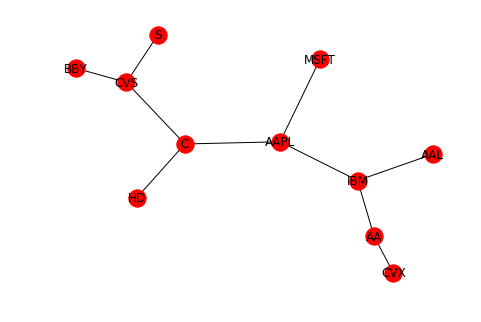

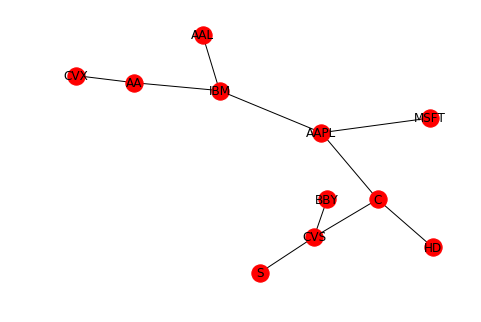

In [24]:
empty = nx.Graph()
stock_edges = formatData('stock_correlations.csv')
stock_graph = createGraph(empty, stock_edges)

appMSTEdges = [('AAPL', 'MSFT', 0.06), ('AA', 'CVX', 0.29), 
               ('AA', 'IBM', 0.2),('AAPL', 'IBM', 0.13),('AAPL', 'C', 0.12),
               ('C', 'CVS', 0.11),('C', 'HD', 0.12),('IBM', 'AAL', 0.09),
               ('CVS', 'S', 0.14),('CVS', 'BBY', 0.20)]
appMST = createGraph(empty, appMSTEdges)

appMstPrim = prims(appMST)
appMstKrus = kruskals(appMST)
if testingFunction(appMstPrim,appMST):
    print("Prim's graph produces the same MST graph as the verified graph.")
else: 
    print("Prim's graph does not produce the same MST graph as the introduction.\n")
if testingFunction(appMstKrus,appMST):
    print("Kruskal's graph produces the same MST graph as the verified graph.\n")
else: 
    print("Kruskal's graph does not produce the same MST graph as the introduction.\n")

visualizeGraph(appMstKrus)
visualizeGraph(appMstPrim)

## Wrap Up 

In this tutorial, we covered MST basics, how to implement Kruskal's and Prim's algorithms, then used our implementations to visualize stock correlation data. For more resources visit the links throughout the module and the following links that were used to develop this tutorial: 
1. <a href = "https://drive.google.com/file/d/0B4z2gzEmkDDCTUhKUWxJQnR0bEk/view"> CMU 15-210 MST notes </a> 
2. <a href = "https://arxiv.org/pdf/cond-mat/0401300.pdf"> Stock Correlation Visualization In Depth </a>
3. <a href = "https://www.macroaxis.com/invest/marketCorrelation"> Stock Correlation Data </a> 